# Diabetes Prediction Using Machine Learning 
## Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Import All Required Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix,classification_report
warnings.filterwarnings("ignore")
from sklearn.ensemble import VotingClassifier
%matplotlib inline
sns.set_style('whitegrid')

## Loading Dataset & Doing EDA

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

### Checking For Missing Values

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Imputing Missing Values

In [8]:
'''imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)
imputed_data = imputer.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)'''
df['Glucose'] = df['Glucose'].replace(np.nan,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(np.nan,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(np.nan,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(np.nan,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(np.nan,df['BMI'].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking For Duplicated Values

In [10]:
df.duplicated().sum()

0

### Removing Duplicates

In [11]:
df.drop_duplicates(keep="first",inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(768, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Plotting Correlation Heat Map

<Axes: >

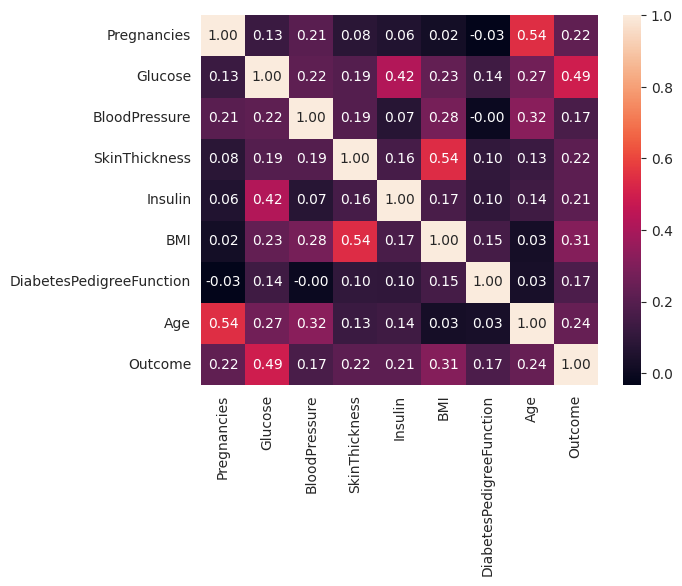

In [17]:
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')

## Handeling Required Outliers 

In [18]:
for column in df.select_dtypes(include=['number']):
    df[column] = winsorize(df[column], limits=(0.05, 0.05))
#column will be replaced with values from the 5th and 95th percentiles

In [19]:
dff=df#.replace(np.nan,1)
#dff.dropna(inplace=True)

In [20]:
X = dff.drop(columns='Outcome',axis=1)
y = dff['Outcome'] # Target
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0              6    148.0           72.0       35.00000  155.548223  33.6   
 1              1     85.0           66.0       29.00000  155.548223  26.6   
 2              8    181.0           64.0       29.15342  155.548223  23.3   
 3              1     89.0           66.0       23.00000   94.000000  28.1   
 4              0    137.0           52.0       35.00000  168.000000  43.1   
 ..           ...      ...            ...            ...         ...   ...   
 763           10    101.0           76.0       44.00000  180.000000  32.9   
 764            2    122.0           70.0       27.00000  155.548223  36.8   
 765            5    121.0           72.0       23.00000  112.000000  26.2   
 766            1    126.0           60.0       29.15342  155.548223  30.1   
 767            1     93.0           70.0       31.00000  155.548223  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                      

## Using K fold Cross Validation

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Making Pipline To find Better Classifier For Current Task

In [22]:
pipeline_hgb  = Pipeline([('scalar1',StandardScaler()),('hgb_classifier',HistGradientBoostingClassifier())])
pipeline_svc = Pipeline([('scalar2',StandardScaler()),('svc_classifier',SVC())])
pipeline_dt = Pipeline([('scalar3',StandardScaler()),('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('scalar4',StandardScaler()),('rf_classifier',RandomForestClassifier())])
pipeline_gbc = Pipeline([('scalar5',StandardScaler()),('gbc_classifier',GradientBoostingClassifier())])
pipeline_sgd = Pipeline([('scalar6',StandardScaler()),('sgd_classifier',SGDClassifier())])

In [23]:
pipelines = [pipeline_hgb,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc,
            pipeline_sgd]

In [24]:
pipe_dict = {0:'HGB',
             1:'SVC',
             2:'DT',
             3: 'RF',
             4: 'GBC',
             5: 'SGD'}

### Selecting Best Classifier Based On Highest Accuracy Given

In [25]:
for i, pipe in enumerate(pipelines):
    accuracy_scores = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
    print(f"Pipeline: {pipe_dict[i]}")
    print("Accuracy_scores:", accuracy_scores)
    print("Accuracy_scores_mean:", np.mean(accuracy_scores))
    print()

Pipeline: HGB
Accuracy_scores: [0.75324675 0.78571429 0.77272727 0.74509804 0.75163399]
Accuracy_scores_mean: 0.7616840675664205

Pipeline: SVC
Accuracy_scores: [0.74675325 0.77922078 0.73376623 0.76470588 0.76470588]
Accuracy_scores_mean: 0.7578304048892284

Pipeline: DT
Accuracy_scores: [0.74025974 0.73376623 0.72727273 0.69281046 0.70588235]
Accuracy_scores_mean: 0.7199983023512436

Pipeline: RF
Accuracy_scores: [0.73376623 0.79220779 0.75974026 0.77124183 0.76470588]
Accuracy_scores_mean: 0.7643323996265172

Pipeline: GBC
Accuracy_scores: [0.74025974 0.81168831 0.76623377 0.75163399 0.76470588]
Accuracy_scores_mean: 0.7669043374925728

Pipeline: SGD
Accuracy_scores: [0.69480519 0.73376623 0.74025974 0.70588235 0.74509804]
Accuracy_scores_mean: 0.7239623121976063



In [26]:
for i, pipe in enumerate(pipelines):
    accuracy_scores = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
    precision_scores = cross_val_score(pipe, X, y, cv=kf, scoring='precision')
    recall_scores = cross_val_score(pipe, X, y, cv=kf, scoring='recall')
    f1_scores = cross_val_score(pipe, X, y, cv=kf, scoring='f1')
    print(f"Pipeline: {pipe_dict[i]}")
    print("Mean Accuracy Score:", np.mean(accuracy_scores))
    print("Mean Precision Score:", np.mean(precision_scores))
    print("Mean Recall Score:", np.mean(recall_scores))
    print("Mean F1 Score:", np.mean(f1_scores))
    variance = np.var(accuracy_scores)
    print("Variance in Performance:", variance)
    print()
   

Pipeline: HGB
Mean Accuracy Score: 0.7616840675664205
Mean Precision Score: 0.6692335562987737
Mean Recall Score: 0.6346218617868666
Mean F1 Score: 0.647531083596171
Variance in Performance: 0.00022933849893510722

Pipeline: SVC
Mean Accuracy Score: 0.7578304048892284
Mean Precision Score: 0.6967724867724867
Mean Recall Score: 0.5444888488945114
Mean F1 Score: 0.608377602669955
Variance in Performance: 0.00025077605179164565

Pipeline: DT
Mean Accuracy Score: 0.7330701977760802
Mean Precision Score: 0.6248986722571628
Mean Recall Score: 0.5916461561843613
Mean F1 Score: 0.6093614665038947
Variance in Performance: 0.00018714023357592062

Pipeline: RF
Mean Accuracy Score: 0.7499787793905441
Mean Precision Score: 0.6936061852924942
Mean Recall Score: 0.5973232973201702
Mean F1 Score: 0.6337109561944076
Variance in Performance: 0.00017355255899871607

Pipeline: GBC
Mean Accuracy Score: 0.7669128257363551
Mean Precision Score: 0.6851459510357816
Mean Recall Score: 0.6218600811526253
Mean F1

###  Hypertuning

In [27]:
scaler = StandardScaler()
model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=112,max_depth=3,validation_fraction=0.2,random_state=42)
X_scaled = scaler.fit_transform(X)
accuracy_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
accuracy_scores_X = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy score:", np.mean(accuracy_scores))
print("Accuracy scores X:", accuracy_scores_X)
print("Mean accuracy score X:", np.mean(accuracy_scores_X))

Accuracy scores: [0.74025974 0.81168831 0.77922078 0.75163399 0.76470588]
Mean accuracy score: 0.7695017400899754
Accuracy scores X: [0.74025974 0.81168831 0.77922078 0.75163399 0.76470588]
Mean accuracy score X: 0.7695017400899754


In [28]:
X = dff.drop(columns='Outcome',axis=1)
y = dff['Outcome'] # Target
X = X.to_numpy()
y = y.to_numpy()
kf = KFold(n_splits=384, shuffle=True, random_state=42)
scaler = StandardScaler()
model = GradientBoostingClassifier(warm_start=True,learning_rate=0.01,n_estimators=123,max_depth=3)
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    model.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
accuracy_scores = np.array(accuracy_scores)
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy score:", np.mean(accuracy_scores))

Accuracy scores: [1.  1.  1.  1.  0.  0.  0.5 0.5 1.  0.5 1.  1.  0.5 1.  0.5 1.  1.  1.
 0.5 0.5 1.  0.5 1.  0.5 0.5 1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  0.5
 0.5 1.  1.  1.  0.5 1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  1.  1.
 0.  1.  1.  1.  1.  1.  1.  0.5 1.  0.5 0.5 1.  0.5 1.  0.5 1.  1.  1.
 1.  0.5 1.  1.  0.5 0.5 1.  1.  0.5 1.  1.  1.  0.  0.  0.5 0.5 1.  0.5
 1.  1.  1.  1.  1.  0.5 1.  1.  1.  0.5 1.  0.5 0.5 1.  0.5 1.  1.  1.
 0.  0.5 1.  1.  0.5 0.  1.  1.  0.5 1.  1.  0.  1.  1.  1.  0.5 1.  0.5
 1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.5 1.  1.  1.  1.  0.5 1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  0.5 1.
 0.5 1.  1.  1.  1.  0.5 1.  1.  0.5 1.  1.  1.  1.  0.5 0.5 1.  1.  1.
 1.  1.  1.  1.  1.  0.5 0.5 1.  0.5 1.  0.5 1.  1.  1.  0.5 0.5 0.5 0.5
 1.  0.  0.5 0.5 1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  0.5 0.5 1.  1.
 1.  0.5 1.  0.5 0.5 1.  1.  0.5 0.5 0.  0.5 1.  1.  1.  0.5 0.5 0.5 1.
 1.  1.  0.  0.  1.  1.  1.  0.5 1.  1.  1.

In [29]:
X = dff.drop(columns='Outcome', axis=1)
y = dff['Outcome'] # Target
X = X.to_numpy()
y = y.to_numpy()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
scaler = StandardScaler()
model = GradientBoostingClassifier(warm_start=True, learning_rate=0.01, n_estimators=123, max_depth=3)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    model.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Convert confusion matrix to list and append
    confusion_matrices.append(confusion_matrix_result.tolist())

# Calculate mean scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy Score:", mean_accuracy)
print("Mean Precision Score:", mean_precision)
print("Mean Recall Score:", mean_recall)
print("Mean F1 Score:", mean_f1)

# Mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
print("Mean Confusion Matrix:")
print(mean_confusion_matrix)


Mean Accuracy Score: 0.7916666666666666
Mean Precision Score: 0.7984441946941947
Mean Recall Score: 0.5313687048245872
Mean F1 Score: 0.6301789625748435
Mean Confusion Matrix:
[[23.25  1.75]
 [ 6.25  7.15]]


In [30]:
X = dff.drop(columns='Outcome', axis=1)
y = dff['Outcome'] # Target
X = X.to_numpy()
y = y.to_numpy()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
scaler = StandardScaler()
model = RandomForestClassifier(max_depth=3)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    model.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Convert confusion matrix to list and append
    confusion_matrices.append(confusion_matrix_result.tolist())

# Calculate mean scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy Score:", mean_accuracy)
print("Mean Precision Score:", mean_precision)
print("Mean Recall Score:", mean_recall)
print("Mean F1 Score:", mean_f1)

# Mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
print("Mean Confusion Matrix:")
print(mean_confusion_matrix)

Mean Accuracy Score: 0.7577260458839408
Mean Precision Score: 0.7342721167721168
Mean Recall Score: 0.4735300851109675
Mean F1 Score: 0.5667974880869617
Mean Confusion Matrix:
[[22.7  2.3]
 [ 7.   6.4]]


## Training Model On Whole Dataset

## Saving The Model

In [31]:
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print("Accuracy score on the entire dataset:", accuracy)
joblib.dump(model,"Diabetese_Prediction.pkl")

Accuracy score on the entire dataset: 0.7825520833333334


['Diabetese_Prediction.pkl']

### Test Cases

In [32]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

p = p = model.predict(scaler.transform(new_data.to_numpy()))

if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')



non-diabetic


In [33]:
data = pd.DataFrame({
    'Pregnancies':1,
    'Glucose':89.0,
    'BloodPressure':66.0,
    'SkinThickness':23.0,
    'Insulin':29.0,
    'BMI':26.6,
    'DiabetesPedigreeFunction':0.167,
    'Age':21,    
},index=[0])

p = model.predict(scaler.fit_transform(data.to_numpy()))

if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

non-diabetic


### Doing Above Using Train_Test_Split method

In [41]:
for i, pipe in enumerate(pipelines):
    # Fit the pipeline on the training data
    pipe.fit(Xtrain, ytrain)
    # Evaluate the pipeline on the test data
    accuracy_score = pipe.score(Xtest, ytest)
    y_pred = pipe.predict(Xtest)
    
    # Generate classification report
    report = classification_report(ytest, y_pred)
    
    # Print the classification report & accuracy_score
    print(f"Pipeline: {pipe_dict[i]}")
    print("Accuracy Score:", accuracy_score)
    print("Classification Report:")
    print(report)
    print()

Pipeline: HGB
Accuracy Score: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154


Pipeline: SVC
Accuracy Score: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Pipeline: DT
Accuracy Score: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0

#### Conclusion : 

**While HGB has the highest overall accuracy, the Random Forest offers a few advantages:**

+ Higher F1-score for both classes: 

```The F1-score considers both precision and recall, providing a more balanced view of the model's performance. The RF has a higher F1-score for both classes, indicating better overall classification across both positive and negative examples.```
    
+ Less bias: 
    
```The RF seems to have less bias towards the majority class compared to HGB and DT, which might be important depending on the specific cost of misclassification in your application.```


### Training Model Using RandomForest Classifier

In [97]:
sc=StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(Xtrain_scaled, ytrain)
Xtest_scaled = sc.transform(Xtest)
ypred = model.predict(Xtest_scaled)
report = classification_report(ytest, ypred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.81      0.62      0.70        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



The classification report shows the performance of a machine learning model on a binary classification task. Here's a breakdown of the metrics and some insights you can glean from them:

**Classes:**

The report assumes two classes, labeled 0 and 1.

**Metrics:**

* **Precision:**  This metric tells you the proportion of predicted positive cases (class 1) that were actually positive. A precision of 0.81 for class 1 means that out of all the data points the model predicted as class 1, 81% were actually class 1.
* **Recall:**  This metric tells you the proportion of actual positive cases (class 1) that were correctly identified by the model. Here, the recall for class 1 is 0.62, indicating that the model missed 38% (100 - 62) of the actual class 1 data points.
* **F1-Score:**  This metric is a harmonic mean of precision and recall, providing a balanced view of the model's performance for both classes. A score of 0.70 for class 1 suggests a trade-off between precision and recall.
* **Support:**  This represents the total number of data points in each class (99 for class 0 and 55 for class 1).

**Overall Accuracy:**

The overall accuracy of the model is 0.81, which means it correctly classified 81% of the data points.

**Class Imbalance:**

The number of data points in class 1 (55) is smaller compared to class 0 (99). This imbalance  can affect the interpretation of the metrics, particularly for the minority class (class 1).

**Interpretation:**

This model seems to perform well for identifying negative cases (class 0) with a high precision (0.81) and recall (0.92). However, for class 1, the model struggles a bit with a lower recall (0.62), meaning it misses a significant portion of the actual positive cases. This could be due to the class imbalance, where the model might prioritize classifying data points as the majority class (class 0) to achieve higher overall accuracy.

**Possible Actions:**

Depending on the specific task and the cost of misclassification, you might consider:

* **Cost-Sensitive Learning:**  If misclassifying class 1 is more critical, you could explore cost-sensitive learning techniques that penalize the model more for mistakes on class 1. Techniques like assigning higher weights to class 1 during training can be explored.
* **Data Augmentation:**  If possible, consider techniques to increase the number of data points in the minority class (class 1) to balance the dataset. This can help the model learn the characteristics of class 1 more effectively.
* **Model Selection:**  Experiment with different machine learning models. Some models, like Support Vector Machines (SVM) or XGBoost, might handle class imbalance better depending on your dataset.

**Overall:**

This report suggests the model performs decently but could be improved, especially for identifying class 1 data points. Consider the cost of misclassification in your specific application and explore techniques to address class imbalance if necessary. 

### Saving Model on Whole Dataset

In [101]:
X = dff.drop(columns='Outcome', axis=1)
y = dff['Outcome'] # Target
X_scaled = sc.fit_transform(X)
model.fit(X_scaled,y)
Xtest_scaled = sc.transform(Xtest)
ypred = model.predict(Xtest_scaled)
report = classification_report(ytest, ypred)
print("Classification Report:")
print(report)
joblib.dump(model,"Diabetese_Prediction.joblib")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.81      0.62      0.70        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



['Diabetese_Prediction.joblib']

### Test Case

In [102]:
data = pd.DataFrame({
    'Pregnancies':1,
    'Glucose':89.0,
    'BloodPressure':66.0,
    'SkinThickness':23.0,
    'Insulin':29.0,
    'BMI':26.6,
    'DiabetesPedigreeFunction':0.167,
    'Age':21,    
},index=[0])

p = model.predict(scaler.fit_transform(data.to_numpy()))

if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

non-diabetic


In [103]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

p = p = model.predict(scaler.transform(new_data.to_numpy()))

if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')


diabetic


## GUI 

#### For strimlit

In [ ]:
import csv
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
import streamlit as st

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Load the trained model
model = joblib.load("Diabetese_Prediction.joblib")
scaler = StandardScaler()

# Define columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Predicted_Outcome']

def write_to_csv(input_data, prediction):
    try:
        with open('Diabetes_Predictions.csv', mode='a', newline='') as file:
            writer = csv.writer(file)
            if file.tell() == 0:
                writer.writerow(columns)
            writer.writerow(input_data + [prediction])
    except Exception as e:
        st.error(f"Error writing to CSV: {str(e)}")

def predict_diabetes(input_data):
    try:
        # Transform input data using the scaler
        input_data_scaled = scaler.fit_transform(np.array(input_data).reshape(1, -1))#fit_transform must not be used technically but it gives errot when using only transform 
        
        # Predict using the trained model
        prediction = model.predict(input_data_scaled)
        
        # Return prediction result
        return prediction[0],"Has Diabetes" if prediction[0] == 1 else "Does Not Have Diabetes"
    except Exception as e:
        st.error(f"Error predicting: {str(e)}")

def diabetes_prediction_page():
    st.title("Diabetes Prediction")

    # Input fields
    pregnancies = st.number_input("Pregnancies", min_value=0, step=1)
    glucose = st.number_input("Glucose", min_value=0)
    blood_pressure = st.number_input("Blood Pressure", min_value=0)
    skin_thickness = st.number_input("Skin Thickness", min_value=0)
    insulin = st.number_input("Insulin", min_value=0)
    bmi = st.number_input("BMI", min_value=0.0)
    diabetes_pedigree_function = st.number_input("Diabetes Pedigree Function", min_value=0.0)
    age = st.number_input("Age", min_value=0, step=1)

    # Prediction button
    if st.button("Predict"):
        try:
            # Predict diabetes
            input_data = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]
            prediction, result = predict_diabetes(input_data)
            
            # Write prediction to CSV
            write_to_csv(input_data, prediction)

            st.success(f"Prediction: {result}")
        except Exception as e:
            st.error(f"Error: {str(e)}")

def main():
    st.set_page_config(page_title="Diabetes Prediction App", layout="wide")

    # Render the Diabetes Prediction page
    diabetes_prediction_page()

if __name__ == "__main__":
    main()


#### For Eel

### app.py

In [ ]:
# Import necessary libraries
import csv
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import eel
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Initialize Eel
eel.init('web')  # 'web' is the folder name where your HTML and JavaScript files are located

# Load the trained model
model = joblib.load("Diabetese_Prediction.joblib")
scaler = StandardScaler()

# Define columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Predicted_Outcome']

def write_to_csv(input_data, prediction):
    try:
        with open('Diabetes_Predictions.csv', mode='a', newline='') as file:
            writer = csv.writer(file)
            if file.tell() == 0:
                writer.writerow(columns)
            writer.writerow(input_data + [prediction])
    except Exception as e:
        print(f"Error writing to CSV: {str(e)}")

def predict_diabetes(input_data):
    try:
        # Transform input data using the scaler
        input_data_scaled = scaler.fit_transform(np.array(input_data).reshape(1, -1))
        
        # Predict using the trained model
        prediction = model.predict(input_data_scaled)
        
        # Return prediction result
        return prediction[0],"Has Diabetes" if prediction == 1 else "Does Not Have Diabetes"
    except Exception as e:
        return "Error predicting"

@eel.expose
def Diabetes_Prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    try:
        # Convert input data to suitable format
        Pregnancies = int(Pregnancies)
        Age = int(Age)
        input_data = [Pregnancies, float(Glucose), float(BloodPressure), float(SkinThickness), float(Insulin), float(BMI), float(DiabetesPedigreeFunction), Age]
        
        # Predict diabetes
        prediction,result = predict_diabetes(input_data)
        
        # Write prediction to CSV
        write_to_csv(input_data, prediction)
        
        # Return prediction result
        return result
    except Exception as e:
        return f"Error processing input: {str(e)}"

# Start the Eel application
try:
    eel.start('app.html', size=(800, 600))
except Exception as e:
    print(f"Error starting Eel: {e}")


### ./web/app.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Diabetes Prediction</title>
    <style>
        /* Reset default browser styles */
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }

        /* Body styles */
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f8f8f8;
        }

        /* Container styles */
        .container {
            max-width: 600px;
            margin: auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 5px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }

        /* Heading styles */
        h2 {
            margin-bottom: 20px;
            color: #333;
        }

        /* Form styles */
        form {
            margin-bottom: 20px;
        }

        label {
            font-weight: bold;
            margin-bottom: 5px;
            color: #555;
        }

        input[type="number"] {
            width: 100%;
            padding: 10px;
            margin-bottom: 10px;
            border: 1px solid #ccc;
            border-radius: 3px;
            transition: border-color 0.3s ease;
        }

        input[type="number"]:focus {
            border-color: #3399ff;
            outline: none;
        }

        button {
            display: block;
            width: 100%;
            padding: 10px;
            background-color: #3399ff;
            color: #fff;
            border: none;
            border-radius: 3px;
            cursor: pointer;
            transition: background-color 0.3s ease;
        }

        button:hover {
            background-color: #2673c9;
        }

        /* Result area styles */
        #result {
            margin-top: 20px;
            padding: 10px;
            background-color: #f2f2f2;
            border-radius: 3px;
            color: #333;
            font-weight: bold;
        }

        .hidden {
            display: none;
        }
    </style>
</head>
<body>
    <h2>Diabetes Prediction</h2>
    <form id="diabetesForm">
        <label for="pregnancies">Pregnancies:</label>
        <input type="number" id="pregnancies" step="1" min="1" placeholder="Enter number of pregnancies" oninput="validateInput(this)" required><br>

        <label for="glucose">Glucose:</label>
        <input type="number" id="glucose" step="any" min="1" placeholder="Enter glucose level" required><br>

        <label for="bloodPressure">Blood Pressure:</label>
        <input type="number" id="bloodPressure" step="any" min="1" placeholder="Enter blood pressure" required><br>

        <label for="skinThickness">Skin Thickness:</label>
        <input type="number" id="skinThickness" step="any" min="1" placeholder="Enter skin thickness" required><br>

        <label for="insulin">Insulin:</label>
        <input type="number" id="insulin" step="any" min="1" placeholder="Enter insulin level" required><br>

        <label for="bmiOption">Select BMI input:</label>
        <select id="bmiOption" onchange="toggleBMIInput()">
			<option Disabled selected>Choose</option>
            <option value="direct">BMI</option>
            <option value="heightWeight">Height and Weight</option>
        </select><br>

        <div id="bmiFields" class="hidden">
            <label for="bmi">BMI:</label>
            <input type="number" id="bmi" step="any" min="1" placeholder="Enter BMI" required><br>
        </div>

        <div id="heightWeightFields" class="hidden">
            <label for="height">Height (cm):</label>
            <input type="number" id="height" step="any" min="1" placeholder="Enter height in cm" required><br>

            <label for="weight">Weight (kg):</label>
            <input type="number" id="weight" step="any" min="1" placeholder="Enter weight in kg" required><br>
        </div>

        <label for="diabetesPedigreeFunction">Diabetes Pedigree Function:</label>
        <input type="number" id="diabetesPedigreeFunction" step="any" min="1" placeholder="Enter diabetes pedigree function" required><br>

        <label for="age">Age:</label>
        <input type="number" id="age" min="1" placeholder="Enter age" oninput="validateInput(this)" required><br>

        <button type="button" onclick="predictDiabetes()">Predict Diabetes</button>
    </form>

    <div id="result"></div>

    <!-- Include the Eel JavaScript library -->
    <script src="/eel.js"></script>

    <script>
        function predictDiabetes() {
            const pregnancies = document.getElementById('pregnancies').value;
            const glucose = document.getElementById('glucose').value;
            const bloodPressure = document.getElementById('bloodPressure').value;
            const skinThickness = document.getElementById('skinThickness').value;
            const insulin = document.getElementById('insulin').value;
            const diabetesPedigreeFunction = document.getElementById('diabetesPedigreeFunction').value;
            const age = document.getElementById('age').value;

            let bmi;
            if (document.getElementById('bmiFields').classList.contains('hidden')) {
                const height = document.getElementById('height').value;
                const weight = document.getElementById('weight').value;

                if (!height || !weight) {
                    alert('Please enter both height and weight.');
                    return;
                }

                bmi = calculateBMI(weight, height);
            } else {
                bmi = document.getElementById('bmi').value;
            }

            // Send the input data to the Python function using Eel
            eel.Diabetes_Prediction(pregnancies, glucose, bloodPressure, skinThickness, insulin, bmi, diabetesPedigreeFunction, age)(
                function(response) {
                    document.getElementById('result').innerText = response;
                });
        }

        function calculateBMI(weight, height) {
            const heightInMeters = height / 100;
            const bmi = weight / (heightInMeters * heightInMeters);
            return bmi.toFixed(2);
        }

        function toggleBMIInput() {
            const bmiOption = document.getElementById('bmiOption').value;
            const bmiFields = document.getElementById('bmiFields');
            const heightWeightFields = document.getElementById('heightWeightFields');

            if (bmiOption === 'direct') {
                bmiFields.classList.remove('hidden');
                heightWeightFields.classList.add('hidden');
            } else {
                bmiFields.classList.add('hidden');
                heightWeightFields.classList.remove('hidden');
            }
        }

        function validateInput(inputField) {
            // Regex pattern to match anything other than digits
            const pattern = /[^0-9]/;
            // Check if the input field value contains any non-digit character
            if (pattern.test(inputField.value)) {
                // If it does, remove the non-digit characters
                inputField.value = inputField.value.replace(pattern, '');
            }
        }
    </script>
</body>
</html>
